In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/train_dataset.csv')

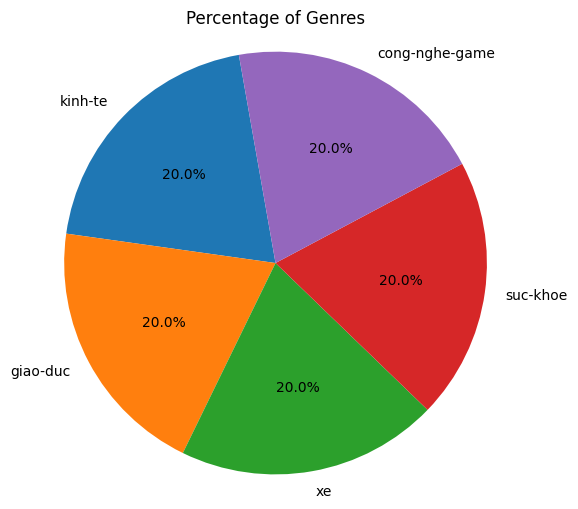

In [4]:
tag_counts = df['genre'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(tag_counts, labels=tag_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Percentage of Genres')
plt.axis('equal')
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

def top_50_most_common_words(df):
    titles = df.tolist()
    
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(titles)
    
    word_frequencies = X.sum(axis=0)
    word_frequencies = [(word, word_frequencies[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    
    sorted_word_frequencies = sorted(word_frequencies, key=lambda x: x[1], reverse=True)
    
    top_50_words = sorted_word_frequencies[:50]
    
    return top_50_words

top_50_most_common_words(df['title'])

[('có', 111),
 ('nam', 110),
 ('xe', 110),
 ('việt', 107),
 ('tại', 101),
 ('sinh', 99),
 ('học', 98),
 ('giá', 97),
 ('trường', 82),
 ('2024', 75),
 ('tô', 75),
 ('người', 75),
 ('đồng', 73),
 ('cho', 72),
 ('mới', 70),
 ('của', 65),
 ('công', 64),
 ('đầu', 64),
 ('cao', 62),
 ('năm', 59),
 ('bị', 59),
 ('với', 58),
 ('không', 58),
 ('triệu', 56),
 ('nhất', 55),
 ('thi', 55),
 ('điện', 54),
 ('nhiều', 52),
 ('khi', 51),
 ('hàng', 50),
 ('bệnh', 50),
 ('hơn', 49),
 ('trên', 49),
 ('ngày', 48),
 ('giảm', 47),
 ('trong', 47),
 ('nhà', 46),
 ('sẽ', 45),
 ('về', 45),
 ('được', 44),
 ('ra', 44),
 ('bán', 43),
 ('từ', 43),
 ('những', 43),
 ('nào', 42),
 ('để', 42),
 ('gì', 42),
 ('tp', 41),
 ('quốc', 41),
 ('vì', 41)]

In [6]:
from wordcloud import WordCloud

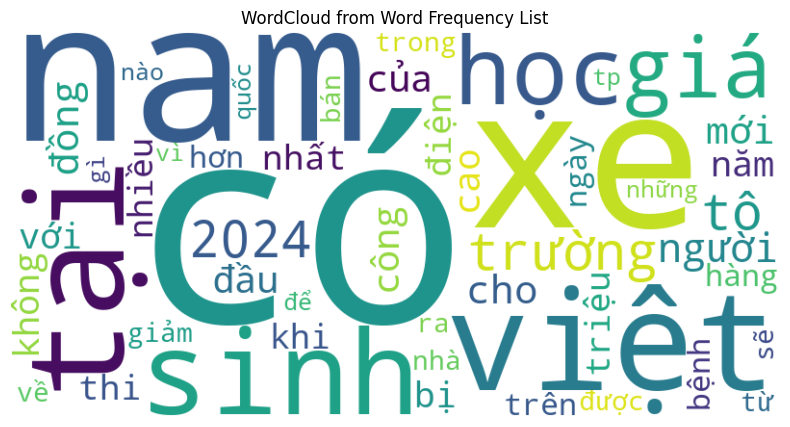

In [8]:
word_freq_dict = dict(top_50_most_common_words(df['title']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud from Word Frequency List')
plt.show()

In [9]:
def word_count(df, n):
    word_count = {}
    for row in df.values:
        tokens = row.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        for i in range(len(tokens) - n + 1):
            ngram = " ".join(tokens[i:i+n])
            if ngram not in word_count:
                word_count[ngram] = 1
            else:
                word_count[ngram] += 1
    return word_count

top50 = word_count(df['title'], 2)
sorted_dict = dict(sorted(top50.items(), key=lambda item: item[1], reverse=True))
sorted_dict

{'việt nam': 77,
 'ô tô': 67,
 'tại việt': 46,
 'học sinh': 43,
 'triệu đồng': 27,
 'cao tốc': 24,
 'tuyển sinh': 23,
 'có thể': 20,
 'lái xe': 20,
 'trên cao': 20,
 'ra mắt': 20,
 'hôm nay': 19,
 'tư vấn': 19,
 'tin tức': 18,
 'sức khỏe:': 18,
 'ung thư': 18,
 'bất ngờ': 17,
 'thi tốt': 17,
 'tốt nghiệp': 17,
 'ngày mới': 17,
 'mới với': 17,
 'với tin': 17,
 'tức sức': 17,
 'phát triển': 15,
 'năm 2024': 15,
 'nghiệp thpt': 15,
 'lợi ích': 15,
 'tỉ đồng': 14,
 'trung quốc': 14,
 'quốc tế': 14,
 'công nghệ': 14,
 'bác sĩ': 14,
 'phát hiện': 14,
 'đề xuất': 13,
 'thị trường': 13,
 'vấn mùa': 13,
 'trường thpt': 13,
 'sức khỏe': 13,
 'doanh nghiệp': 12,
 'đầu tư': 12,
 'xe máy': 12,
 'lưu ý': 12,
 'mùa thi': 12,
 'sản xuất': 11,
 'hỗ trợ': 11,
 'đông nam': 11,
 'sử dụng': 11,
 'sinh lớp': 11,
 'nhất việt': 11,
 'người việt': 11,
 'ngân hàng': 10,
 'giá vàng': 10,
 'giá usd': 10,
 'usd hôm': 10,
 'vì sao': 10,
 'trường đh': 10,
 'giáo viên': 10,
 'phân khúc': 10,
 'doanh số': 10,
 'điều t

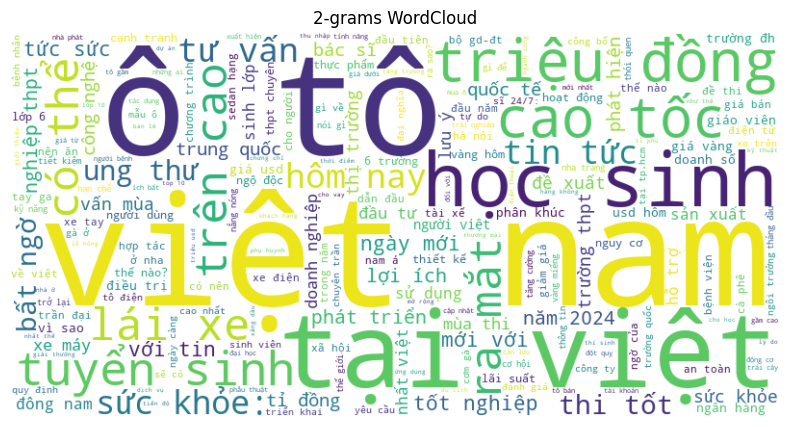

In [10]:
word_freq_dict = dict(sorted_dict)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('2-grams WordCloud')
plt.show()

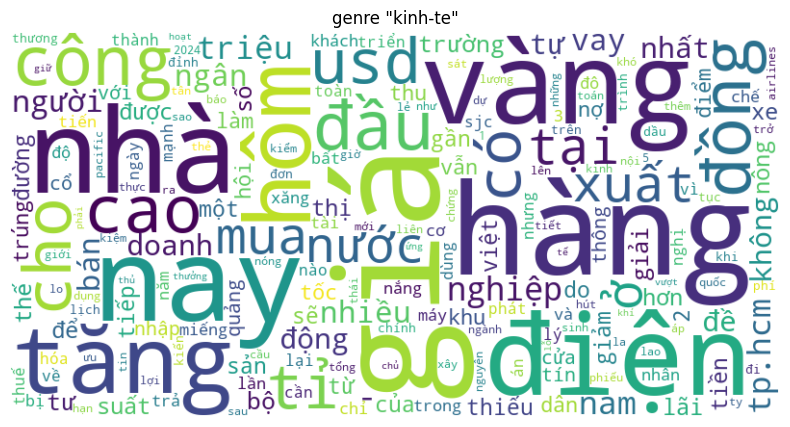

In [11]:
top50 = word_count(df[df['genre'] == 'kinh-te']['title'], 1)
sorted_dict = dict(sorted(top50.items(), key=lambda item: item[1], reverse=True))
word_freq_dict = dict(sorted_dict)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('genre "kinh-te"')
plt.show()

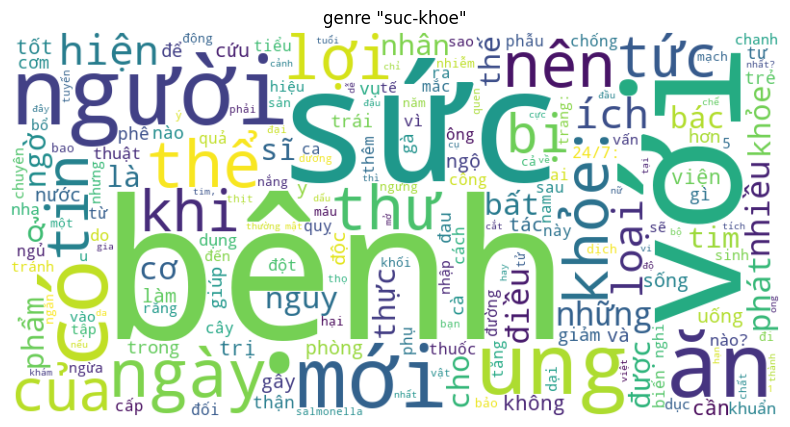

In [12]:
top50 = word_count(df[df['genre'] == 'suc-khoe']['title'], 1)
sorted_dict = dict(sorted(top50.items(), key=lambda item: item[1], reverse=True))
word_freq_dict = dict(sorted_dict)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('genre "suc-khoe"')
plt.show()

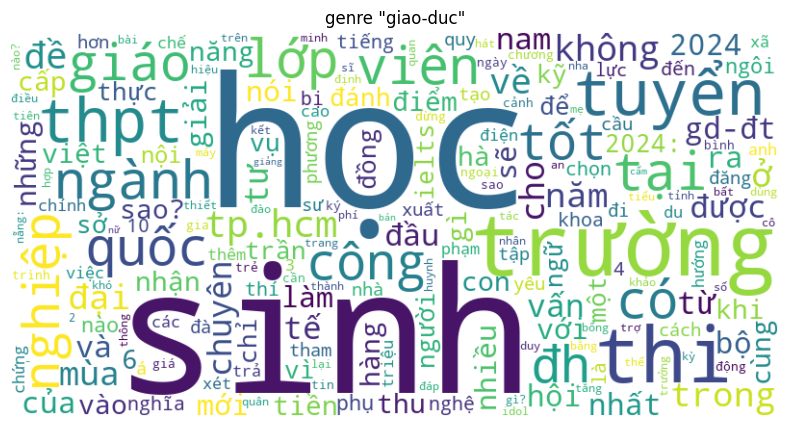

In [13]:
top50 = word_count(df[df['genre'] == 'giao-duc']['title'], 1)
sorted_dict = dict(sorted(top50.items(), key=lambda item: item[1], reverse=True))
word_freq_dict = dict(sorted_dict)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('genre "giao-duc"')
plt.show()

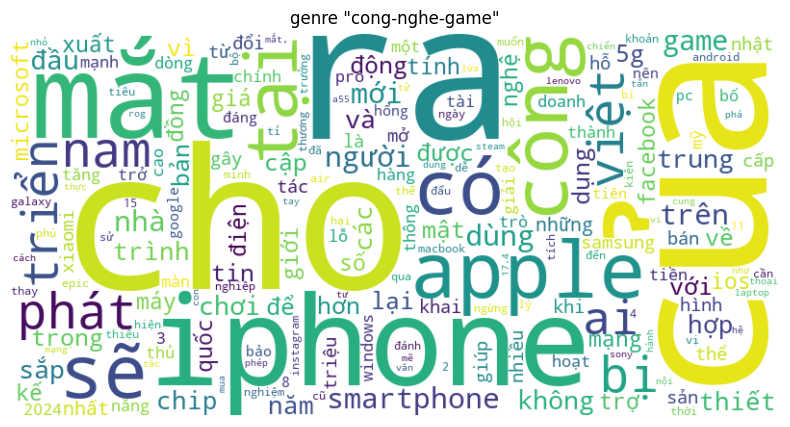

In [14]:
top50 = word_count(df[df['genre'] == 'cong-nghe-game']['title'], 1)
sorted_dict = dict(sorted(top50.items(), key=lambda item: item[1], reverse=True))
word_freq_dict = dict(sorted_dict)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('genre "cong-nghe-game"')
plt.show()

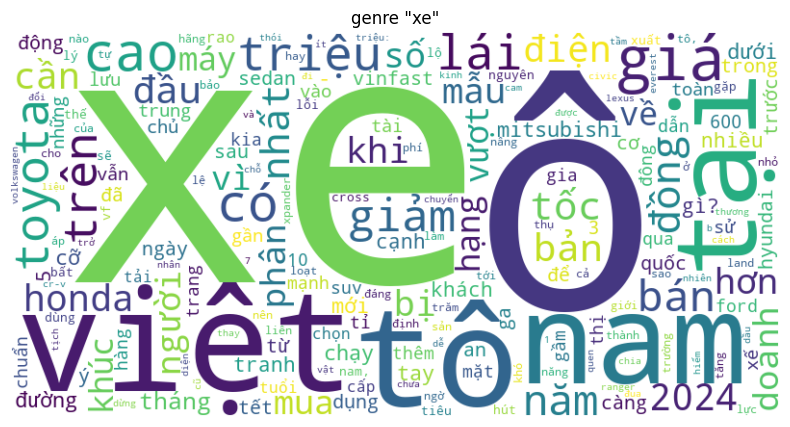

In [15]:
top50 = word_count(df[df['genre'] == 'xe']['title'], 1)
sorted_dict = dict(sorted(top50.items(), key=lambda item: item[1], reverse=True))
word_freq_dict = dict(sorted_dict)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('genre "xe"')
plt.show()